# matplotlib

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

For all plots, make sure that you use labels with units as appropriate, and make good choices about all of the plot characteristics like fontsize, colors, and markersize. I'll be grading your plots with clarity and design in mind.

There are no functions set up for you in this assignment. You can write functions to use in your code if you want, or not — it is up to you. I'll be manually grading these questions by inspection, so there are no tests for you to run.

### 1. Plot a sin wave

Plot the function sin($2 \pi x$) from x = 0 to 20. Label the graph, where the x-axis is time, and the y-axis is amplitude. Make sure you use enough points in $x$ that the function is resolved or fully visible.

---

Grading rubric [4 points]:

* [2 pts] Plotted data is correct over the right range
* [2 pts] Asthetics: Colors, resolution of line, labels, etc.


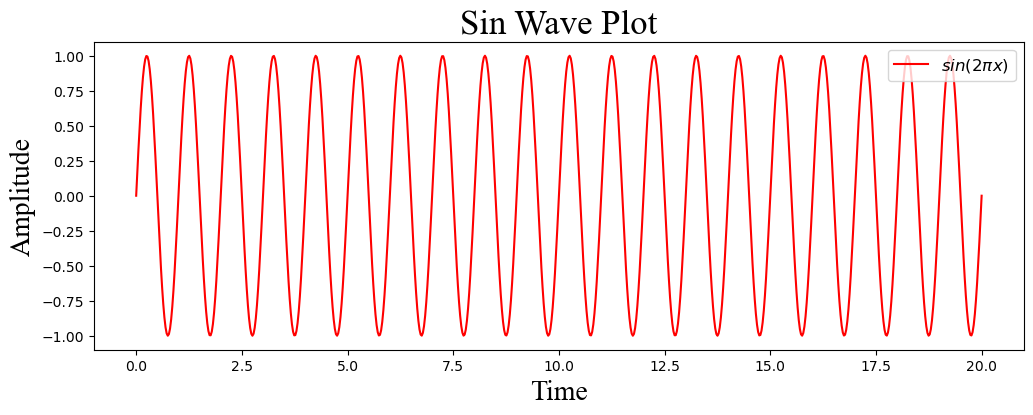

In [39]:
# YOUR CODE HERE
#raise NotImplementedError()

x = np.linspace(0, 20, 750) # 750 is the number of points generated
y = np.sin(2 * np.pi * x)

fig, ax = plt.subplots(figsize=(12, 4)) # figsize sets the length and width of figure
plt.plot(x, y, color='red', label='$sin(2\\pi x)$')

ax.legend(fontsize=12, loc='upper right')
ax.set_xlabel('Time', size=20, fontdict={'fontname':'Times New Roman'})
ax.set_ylabel('Amplitude', size=20, fontdict={'fontname':'Times New Roman'})
ax.set_title('Sin Wave Plot', size=25, fontdict={'fontname':'Times New Roman'})

fig

### 2. Plot a function and the mean

Plot the fourth power of the same function as in problem 1, [sin($2 \pi x$)]$^4$, over the same range, x = 0 to 20. Plot the mean of this function over the range using a distinct line style. Lable the axes and lines.

---

Grading rubric [4 points]:

* [2 pts] Plotted data is correct
* [2 pts] Asthetics: readability, colors, labels, etc.

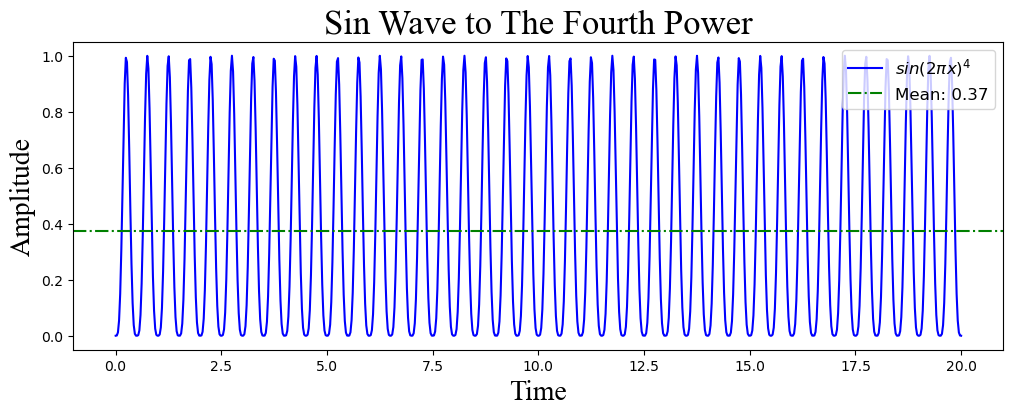

In [40]:
# YOUR CODE HERE
# raise NotImplementedError()
x = np.linspace(0, 20, 750) # 750 is the number of points generated
y = (np.sin(2 * np.pi * x) ** 4)
mean = np.mean(y)

fig, ax = plt.subplots(figsize=(12, 4)) # figsize sets the length and width of figure
plt.plot(x, y, color='blue', label='$sin(2\\pi x)^4$')

ax.axhline(mean, color='green', label='Mean: ' + str(round(mean,2)), linestyle='-.')
ax.legend(fontsize=12, loc='upper right')
ax.set_xlabel('Time', size=20, fontdict={'fontname':'Times New Roman'})
ax.set_ylabel('Amplitude', size=20, fontdict={'fontname':'Times New Roman'})
ax.set_title('Sin Wave to The Fourth Power', size=25, fontdict={'fontname':'Times New Roman'})

fig

### 3. Fit a line and plot

Load in the long-term Mauna Loa carbon dioxide dataset:

    mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')

to access the CO$_2$ data (use the interpolated column since the data gaps are filled). Make two figures based on this data:

##### Figure 1
Fit a 1st (straight line), 3rd, and 5th order polynomial to the data, then plot the polynomial fits along with the original data to compare. The fits should be shown only in the range of the data.

###### Figure 2
Also, use your polynomial fits to predict CO$_2$ in the year 2150. Show your predictions by making another plot and showing the three polynomials extended out to 2150. Then print the function values at 2150.

###### Interpretation
Which polynomial fit do you think is best and why?

---

Grading rubric [8 points]:

* [3 pts] Plotted data and polynomial fits that are labeled, clear, and look nice. The polynomial fits should look reasonable for the data.
* [3 pts] Get proper values for the prediction at 2150 and show extension into future graphically in plot.
* [2 pts] Interpretation explanation.

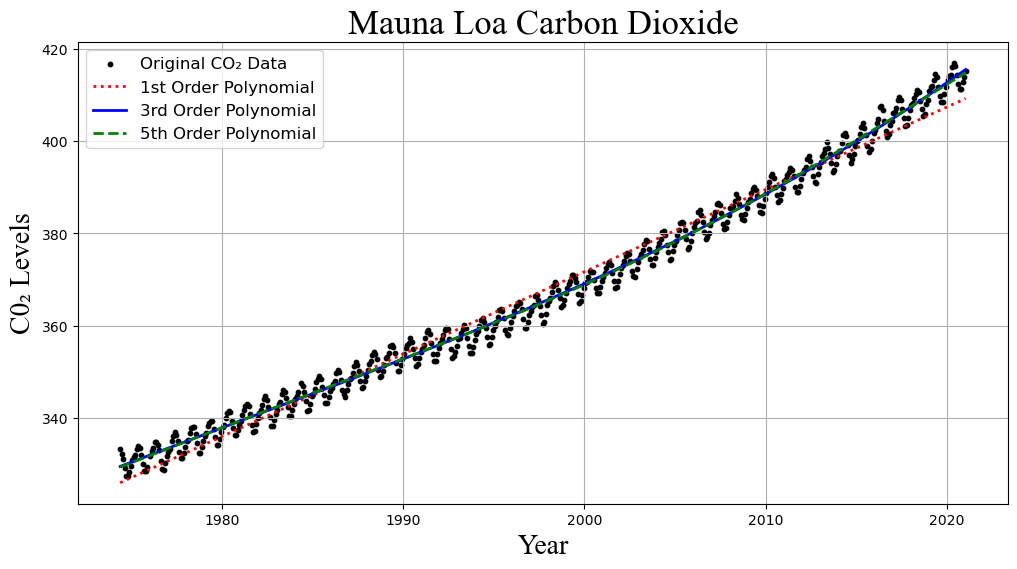

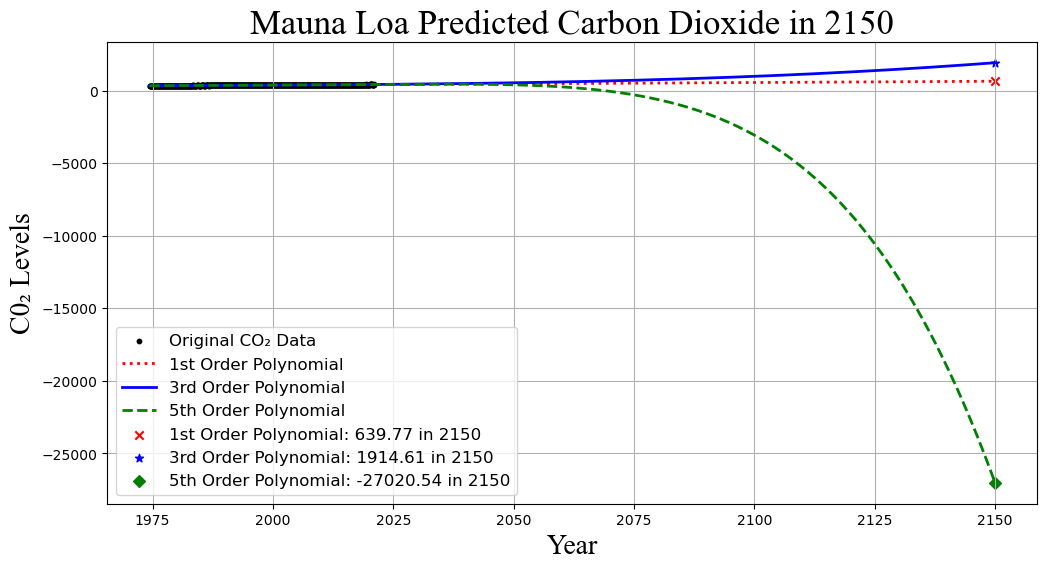

Predicted CO₂ levels in the year 2150:
1st Order Polynomial: 639.77
3rd Order Polynomial: 1914.61
5th Order Polynomial: -27020.54


In [42]:
# YOUR CODE HERE
# raise NotImplementedError()
# Figure 1
# loads specific columns only
data = np.loadtxt('C:/Users/anagomez/M5/co2_mm_mlo.txt', comments="#", usecols=(2, 3, 6))
decimal_date = data[:, 0]
co2 = data[:, 1]
st_dev = data[:, 2]

# if st. dev of days is greater than 0 then it is a valid carbon dioxide record
valid_co2_level = st_dev >= 0  
decimal_date = decimal_date[valid_co2_level]
co2 = co2[valid_co2_level]

# 1st, 3rd and 5th order polynomials
polynomial_1 = np.polyfit(decimal_date, co2, 1)
polynomial_3 = np.polyfit(decimal_date, co2, 3)
polynomial_5 = np.polyfit(decimal_date, co2, 5)

# poly1d creates polynomial function
poly_1 = np.poly1d(polynomial_1)
poly_3 = np.poly1d(polynomial_3)
poly_5 = np.poly1d(polynomial_5)

x = np.linspace(min(decimal_date), max(decimal_date), 750)
y1 = poly_1(x)
y3 = poly_3(x)
y5 = poly_5(x)

fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(decimal_date, co2, color='black', label='Original CO₂ Data',s=10) # original data
plt.plot(x, y1, color='red', linestyle=':', linewidth=2, label='1st Order Polynomial')
plt.plot(x, y3, color='blue', linestyle='-', linewidth=2, label='3rd Order Polynomial')
plt.plot(x, y5, color='green', linestyle='--', linewidth=2, label='5th Order Polynomial')

ax.legend(fontsize=12, loc='upper left')
ax.set_xlabel('Year', size=20, fontdict={'fontname':'Times New Roman'})
ax.set_ylabel('C0₂ Levels', size=20, fontdict={'fontname':'Times New Roman'})
ax.set_title('Mauna Loa Carbon Dioxide', size=25, fontdict={'fontname':'Times New Roman'})
ax.grid()
fig


# Figure 2
x_predict = np.linspace(min(decimal_date), 2150, 750)
y1_predict = poly_1(x_predict)
y3_predict = poly_3(x_predict)
y5_predict = poly_5(x_predict)

co2_predict_1 = poly_1(2150)
co2_predict_3 = poly_3(2150)
co2_predict_5 = poly_5(2150)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(decimal_date, co2, color='black', label='Original CO₂ Data', s=10)
ax.plot(x_predict, y1_predict, color='red', linestyle=':', linewidth=2, label='1st Order Polynomial')
ax.plot(x_predict, y3_predict, color='blue', linestyle='-', linewidth=2, label='3rd Order Polynomial', )
ax.plot(x_predict, y5_predict, color='green', linestyle='--', linewidth=2, label='5th Order Polynomial')


ax.scatter(2150, co2_predict_1, color='red', marker='x', label='1st Order Polynomial: ' + str(round(co2_predict_1, 2)) + ' in 2150')
ax.scatter(2150, co2_predict_3, color='blue', marker='*', label='3rd Order Polynomial: ' + str(round(co2_predict_3, 2)) + ' in 2150')
ax.scatter(2150, co2_predict_5, color='green', marker='D', label='5th Order Polynomial: ' + str(round(co2_predict_5, 2)) + ' in 2150')

ax.legend(fontsize=12, loc='lower left')
ax.set_xlabel('Year', size=20, fontdict={'fontname':'Times New Roman'})
ax.set_ylabel('C0₂ Levels', size=20, fontdict={'fontname':'Times New Roman'})
ax.set_title('Mauna Loa Predicted Carbon Dioxide in 2150', size=25, fontdict={'fontname':'Times New Roman'})
ax.grid()
plt.show()

print('Predicted CO₂ levels in the year 2150:')
print('1st Order Polynomial: ' + str(round(co2_predict_1, 2)))
print('3rd Order Polynomial: ' + str(round(co2_predict_3, 2)))
print('5th Order Polynomial: ' + str(round(co2_predict_5, 2)))

# Interpretation Question
Which polynomial fit do you think is best and why?

* I think the 3rd Order Polynomial is best because in the 2150 prediction figure it shows C0₂ Levels gradually increasing mathing the trend of the current data shown in Figure 1. 5th order polynomial shows it drastically decreasing into the negatives making it too unpredictacble. 1st order polynomial predicts the levels will stay at a constant rate which is not realistic.

**References:**
* https://www.geeksforgeeks.org/plotting-sine-and-cosine-graph-using-matloplib-in-python/
* https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
* https://numpy.org/doc/stable/reference/generated/numpy.sin.html
* https://stackoverflow.com/questions/17941083/how-to-label-a-line-in-matplotlib
* https://www.geeksforgeeks.org/how-to-round-floating-value-to-two-decimals-in-python/
* https://www.geeksforgeeks.org/line-plot-styles-in-matplotlib/
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
* https://how2matplotlib.com/matplotlib-legend-size.html
* https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
* https://www.geeksforgeeks.org/numpys-polyfit-function-a-comprehensive-guide/
* https://www.statology.org/matplotlib-line-thickness/
* https://stackabuse.com/matplotlib-change-scatter-plot-marker-size/
* https://www.geeksforgeeks.org/matplotlib-axes-axes-grid-in-python/